In [1]:
import pandas as pd
import numpy as np

### Create a PandasDataframe

In [2]:
df = pd.DataFrame({'int_col' : [1,2,6,8,-1], 
                   'float_col' : [0.1, 0.2,0.2,10.1,None], 
                   'str_col' : ['a','b',None,'c','a']})

### Check out your newly created DataFrame

In [3]:
df

float_col  int_col str_col
0        0.1        1       a
1        0.2        2       b
2        0.2        6    None
3       10.1        8       c
4        NaN       -1       a

In [4]:
df.head(1)

float_col  int_col str_col
0        0.1        1       a

In [5]:
df.describe()

float_col   int_col
count    4.00000  5.000000
mean     2.65000  3.200000
std      4.96689  3.701351
min      0.10000 -1.000000
25%      0.17500  1.000000
50%      0.20000  2.000000
75%      2.67500  6.000000
max     10.10000  8.000000

In [6]:
df.shape

(5, 3)

In [7]:
df.columns

Index([u'float_col', u'int_col', u'str_col'], dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=5, step=1)

### Load Iris dataset from file

In [2]:
iris = pd.read_csv("../Data/iris.csv")
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

### Subsetting

#### Columns

In [10]:
iris['Name'].head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object

In [11]:
iris['Name','SepalWidth'].head()

KeyError: ('Name', 'SepalWidth')

In [ ]:
iris[['Name','SepalWidth']].head()

In [ ]:
df.filter(regex='t_')

#### Rows

In [ ]:
iris[20:22]

#### Rows and Columns

In [ ]:
iris[20:22,'Name']

In [ ]:
iris.loc[20:22,'Name']

In [ ]:
iris.loc[:,'SepalLength':'PetalLength'].head()

In [ ]:
iris.loc[:3,'SepalLength':'PetalLength']

In [ ]:
iris.loc[3:,'SepalLength':'PetalLength'].head()

In [ ]:
iris['SepalLength'] > 6

In [ ]:
iris[iris['SepalLength'] > 6].head()

In [ ]:
iris[iris['SepalLength'] > 6].describe()

In [ ]:
iris.loc[iris['SepalLength'] > 6, ['SepalLength','Name']].head()

In [ ]:
iris_indexed = iris.set_index('Name')

In [ ]:
mask = iris_indexed%2==0
iris_indexed[mask.any(axis=1)]

In [ ]:
mask

In [ ]:
iris.iloc[:3,[0,2]]

In [12]:
iris.iloc[:3,2:].head()

PetalLength  PetalWidth         Name
0          1.4         0.2  Iris-setosa
1          1.4         0.2  Iris-setosa
2          1.3         0.2  Iris-setosa

### Creating columns

In [36]:
iris['SepLeng_Width_fraction'] = iris['SepalWidth'] / iris['SepalLength']
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name  pedal_ratio  \
0          5.1         3.5          1.4         0.2  Iris-setosa     0.142857   
1          4.9         3.0          1.4         0.2  Iris-setosa     0.142857   
2          4.7         3.2          1.3         0.2  Iris-setosa     0.153846   
3          4.6         3.1          1.5         0.2  Iris-setosa     0.133333   
4          5.0         3.6          1.4         0.2  Iris-setosa     0.142857   

   sepal_ratio  SepLeng_Width_fraction  large_SepLeng_Width_fraction  
0     0.686275                0.686275                         False  
1     0.612245                0.612245                         False  
2     0.680851                0.680851                         False  
3     0.673913                0.673913                         False  
4     0.720000                0.720000                         False

In [37]:
iris['large_SepLeng_Width_fraction'] = iris['SepLeng_Width_fraction'] > iris.SepLeng_Width_fraction.quantile(.95)
iris.head(10)

SepalLength  SepalWidth  PetalLength  PetalWidth         Name  pedal_ratio  \
0          5.1         3.5          1.4         0.2  Iris-setosa     0.142857   
1          4.9         3.0          1.4         0.2  Iris-setosa     0.142857   
2          4.7         3.2          1.3         0.2  Iris-setosa     0.153846   
3          4.6         3.1          1.5         0.2  Iris-setosa     0.133333   
4          5.0         3.6          1.4         0.2  Iris-setosa     0.142857   
5          5.4         3.9          1.7         0.4  Iris-setosa     0.235294   
6          4.6         3.4          1.4         0.3  Iris-setosa     0.214286   
7          5.0         3.4          1.5         0.2  Iris-setosa     0.133333   
8          4.4         2.9          1.4         0.2  Iris-setosa     0.142857   
9          4.9         3.1          1.5         0.1  Iris-setosa     0.066667   

   sepal_ratio  SepLeng_Width_fraction  large_SepLeng_Width_fraction  
0     0.686275                0.686275                         False  
1     0.612245                0.612245                         False  
2     0.680851                0.680851                         False  
3     0.673913                0.673913                         False  
4     0.720000                0.720000                         False  
5     0.722222                0.722222                         False  
6     0.739130                0.739130                          True  
7     0.680000                0.680000                         False  
8     0.659091                0.659091                         False  
9     0.632653                0.632653                         False

In [38]:
iris = iris.assign(sepal_ratio = lambda x: (x['SepalWidth'] / x['SepalLength']),
           pedal_ratio = lambda x: (x['PetalWidth'] / x['PetalLength']))
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name  pedal_ratio  \
0          5.1         3.5          1.4         0.2  Iris-setosa     0.142857   
1          4.9         3.0          1.4         0.2  Iris-setosa     0.142857   
2          4.7         3.2          1.3         0.2  Iris-setosa     0.153846   
3          4.6         3.1          1.5         0.2  Iris-setosa     0.133333   
4          5.0         3.6          1.4         0.2  Iris-setosa     0.142857   

   sepal_ratio  SepLeng_Width_fraction  large_SepLeng_Width_fraction  
0     0.686275                0.686275                         False  
1     0.612245                0.612245                         False  
2     0.680851                0.680851                         False  
3     0.673913                0.673913                         False  
4     0.720000                0.720000                         False

In [39]:
iris.drop(['SepLeng_Width_fraction','large_SepLeng_Width_fraction','pedal_ratio','sepal_ratio'], axis=1).head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [42]:
iris.loc[:,'SepalLength':'Name'].head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [22]:
del df

In [43]:
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name  pedal_ratio  \
0          5.1         3.5          1.4         0.2  Iris-setosa     0.142857   
1          4.9         3.0          1.4         0.2  Iris-setosa     0.142857   
2          4.7         3.2          1.3         0.2  Iris-setosa     0.153846   
3          4.6         3.1          1.5         0.2  Iris-setosa     0.133333   
4          5.0         3.6          1.4         0.2  Iris-setosa     0.142857   

   sepal_ratio  SepLeng_Width_fraction  large_SepLeng_Width_fraction  
0     0.686275                0.686275                         False  
1     0.612245                0.612245                         False  
2     0.680851                0.680851                         False  
3     0.673913                0.673913                         False  
4     0.720000                0.720000                         False

In [44]:
iris.drop(['SepLeng_Width_fraction','large_SepLeng_Width_fraction','pedal_ratio','sepal_ratio'], axis=1,inplace=True)

In [46]:
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

### Joining DataFrames

In [49]:
iris['Name'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [50]:
setosa = iris[iris['Name']=='Iris-setosa']
versicolor = iris[iris['Name']=='Iris-versicolor']
virginica = iris[iris['Name']=='Iris-virginica']

In [51]:
pd.concat([setosa,versicolor,virginica]).head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [57]:
def splitDF(df, identifier):
    d = {}
    for name in iris[identifier].unique():
        d[name] = iris[iris[identifier]== name]
    return(d)

In [60]:
iris_dict = splitDF(iris,'Name')

In [66]:
iris_dict['Iris-setosa'].head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [68]:
iris_df = pd.concat(iris_dict,axis=0)
iris_df.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
Iris-setosa 0          5.1         3.5          1.4         0.2  Iris-setosa
            1          4.9         3.0          1.4         0.2  Iris-setosa
            2          4.7         3.2          1.3         0.2  Iris-setosa
            3          4.6         3.1          1.5         0.2  Iris-setosa
            4          5.0         3.6          1.4         0.2  Iris-setosa

In [67]:
left = iris.loc[:,['SepalLength','SepalWidth','Name']]
right = iris.loc[:,['PetalLength','PetalWidth','Name']]
pd.merge(left,right,on='Name').head()

SepalLength  SepalWidth         Name  PetalLength  PetalWidth
0          5.1         3.5  Iris-setosa          1.4         0.2
1          5.1         3.5  Iris-setosa          1.4         0.2
2          5.1         3.5  Iris-setosa          1.3         0.2
3          5.1         3.5  Iris-setosa          1.5         0.2
4          5.1         3.5  Iris-setosa          1.4         0.2

In [85]:
pd.merge(left,right,on='Name',how='left').head()

SepalLength  SepalWidth         Name  PetalLength  PetalWidth
0          5.1         3.5  Iris-setosa          1.4         0.2
1          5.1         3.5  Iris-setosa          1.4         0.2
2          5.1         3.5  Iris-setosa          1.3         0.2
3          5.1         3.5  Iris-setosa          1.5         0.2
4          5.1         3.5  Iris-setosa          1.4         0.2

In [86]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
print(left_frame)
print('\n')
print(right_frame)

   key left_value
0    0          a
1    1          b
2    2          c
3    3          d
4    4          e


   key right_value
0    2           f
1    3           g
2    4           h
3    5           i
4    6           j


In [87]:
pd.merge(left_frame, right_frame, on='key', how='inner')

key left_value right_value
0    2          c           f
1    3          d           g
2    4          e           h

In [88]:
pd.merge(left_frame, right_frame, on='key', how='left')

key left_value right_value
0    0          a         NaN
1    1          b         NaN
2    2          c           f
3    3          d           g
4    4          e           h

In [90]:
pd.merge(left_frame, right_frame, on='key', how='right')

key left_value right_value
0    2          c           f
1    3          d           g
2    4          e           h
3    5        NaN           i
4    6        NaN           j

In [91]:
pd.merge(left_frame, right_frame, on='key', how='outer')

key left_value right_value
0    0          a         NaN
1    1          b         NaN
2    2          c           f
3    3          d           g
4    4          e           h
5    5        NaN           i
6    6        NaN           j

In [92]:
grouped = iris.groupby('Name')
grouped

In [93]:
for name, group in grouped:
           print(name)
           print(group.sum())

Iris-setosa
SepalLength                                                250.3
SepalWidth                                                 170.9
PetalLength                                                 73.2
PetalWidth                                                  12.2
Name           Iris-setosaIris-setosaIris-setosaIris-setosaIr...
dtype: object
Iris-versicolor
SepalLength                                                296.8
SepalWidth                                                 138.5
PetalLength                                                  213
PetalWidth                                                  66.3
Name           Iris-versicolorIris-versicolorIris-versicolorI...
dtype: object
Iris-virginica
SepalLength                                                329.4
SepalWidth                                                 148.7
PetalLength                                                277.6
PetalWidth                                                 101.3
Name           Iris

In [94]:
grouped.sum()

SepalLength  SepalWidth  PetalLength  PetalWidth
Name                                                             
Iris-setosa            250.3       170.9         73.2        12.2
Iris-versicolor        296.8       138.5        213.0        66.3
Iris-virginica         329.4       148.7        277.6       101.3

In [96]:
iris.groupby(['Name']).get_group('Iris-setosa').head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [101]:
print grouped.get_group('Iris-setosa').sum()
print grouped.get_group('Iris-versicolor').sum()
print grouped.get_group('Iris-virginica').sum()

PetalLength     73.2
PetalWidth      12.2
SepalLength    250.3
SepalWidth     170.9
dtype: float64
PetalLength    213.0
PetalWidth      66.3
SepalLength    296.8
SepalWidth     138.5
dtype: float64
PetalLength    277.6
PetalWidth     101.3
SepalLength    329.4
SepalWidth     148.7
dtype: float64


In [10]:
grouped.get_group('Iris-versicolor').head()

SepalLength  SepalWidth  PetalLength  PetalWidth             Name
50          7.0         3.2          4.7         1.4  Iris-versicolor
51          6.4         3.2          4.5         1.5  Iris-versicolor
52          6.9         3.1          4.9         1.5  Iris-versicolor
53          5.5         2.3          4.0         1.3  Iris-versicolor
54          6.5         2.8          4.6         1.5  Iris-versicolor

In [3]:
melted_iris = iris.melt(id_vars='Name',value_vars=iris.columns[0:3],var_name='measurement',value_name='value')
melted_iris.head()

Name  measurement  value
0  Iris-setosa  SepalLength    5.1
1  Iris-setosa  SepalLength    4.9
2  Iris-setosa  SepalLength    4.7
3  Iris-setosa  SepalLength    4.6
4  Iris-setosa  SepalLength    5.0

In [9]:
melted_iris_index = melted_iris.set_index('Name')
melted_iris_index.head()

measurement  value
Name                           
Iris-setosa  SepalLength    5.1
Iris-setosa  SepalLength    4.9
Iris-setosa  SepalLength    4.7
Iris-setosa  SepalLength    4.6
Iris-setosa  SepalLength    5.0

In [10]:
melted_iris_index.pivot(columns='measurement',values='value')

ValueError: Index contains duplicate entries, cannot reshape

In [8]:
p_iris = melted_iris.pivot(index="Name",columns='measurement',values='value')

ValueError: Index contains duplicate entries, cannot reshape

In [7]:
p_iris

measurement  PetalLength  SepalLength  SepalWidth
0                    NaN          5.1         NaN
1                    NaN          4.9         NaN
2                    NaN          4.7         NaN
3                    NaN          4.6         NaN
4                    NaN          5.0         NaN
5                    NaN          5.4         NaN
6                    NaN          4.6         NaN
7                    NaN          5.0         NaN
8                    NaN          4.4         NaN
9                    NaN          4.9         NaN
10                   NaN          5.4         NaN
11                   NaN          4.8         NaN
12                   NaN          4.8         NaN
13                   NaN          4.3         NaN
14                   NaN          5.8         NaN
15                   NaN          5.7         NaN
16                   NaN          5.4         NaN
17                   NaN          5.1         NaN
18                   NaN          5.7         NaN
19                   NaN          5.1         NaN
20                   NaN          5.4         NaN
21                   NaN          5.1         NaN
22                   NaN          4.6         NaN
23                   NaN          5.1         NaN
24                   NaN          4.8         NaN
25                   NaN          5.0         NaN
26                   NaN          5.0         NaN
27                   NaN          5.2         NaN
28                   NaN          5.2         NaN
29                   NaN          4.7         NaN
..                   ...          ...         ...
420                  5.7          NaN         NaN
421                  4.9          NaN         NaN
422                  6.7          NaN         NaN
423                  4.9          NaN         NaN
424                  5.7          NaN         NaN
425                  6.0          NaN         NaN
426                  4.8          NaN         NaN
427                  4.9          NaN         NaN
428                  5.6          NaN         NaN
429                  5.8          NaN         NaN
430                  6.1          NaN         NaN
431                  6.4          NaN         NaN
432                  5.6          NaN         NaN
433                  5.1          NaN         NaN
434                  5.6          NaN         NaN
435                  6.1          NaN         NaN
436                  5.6          NaN         NaN
437                  5.5          NaN         NaN
438                  4.8          NaN         NaN
439                  5.4          NaN         NaN
440                  5.6          NaN         NaN
441                  5.1          NaN         NaN
442                  5.1          NaN         NaN
443                  5.9          NaN         NaN
444                  5.7          NaN         NaN
445                  5.2          NaN         NaN
446                  5.0          NaN         NaN
447                  5.2          NaN         NaN
448                  5.4          NaN         NaN
449                  5.1          NaN         NaN

[450 rows x 3 columns]

In [71]:
def index(df):
    df['id'] = range(0,len(df))
    return df

In [72]:
pivoted_iris = melted_iris.groupby(['Name','measurement']).apply(index).pivot_table(index=['id'],
                                                      columns=['Name','measurement'],
                                                      values='value')

pivoted_iris.head()

Name        Iris-setosa                        Iris-versicolor              \
measurement PetalLength SepalLength SepalWidth     PetalLength SepalLength   
id                                                                           
0                   1.4         5.1        3.5             4.7         7.0   
1                   1.4         4.9        3.0             4.5         6.4   
2                   1.3         4.7        3.2             4.9         6.9   
3                   1.5         4.6        3.1             4.0         5.5   
4                   1.4         5.0        3.6             4.6         6.5   

Name                   Iris-virginica                         
measurement SepalWidth    PetalLength SepalLength SepalWidth  
id                                                            
0                  3.2            6.0         6.3        3.3  
1                  3.2            5.1         5.8        2.7  
2                  3.1            5.9         7.1        3.0  
3                  2.3            5.6         6.3        2.9  
4                  2.8            5.8         6.5        3.0

In [73]:
stacked = pivoted_iris.stack(level=0).reset_index().drop('id',axis=1)
stacked.head()

measurement             Name  PetalLength  SepalLength  SepalWidth
0                Iris-setosa          1.4          5.1         3.5
1            Iris-versicolor          4.7          7.0         3.2
2             Iris-virginica          6.0          6.3         3.3
3                Iris-setosa          1.4          4.9         3.0
4            Iris-versicolor          4.5          6.4         3.2

In [74]:
stacked = pivoted_iris.stack(level=1).reset_index().drop('id',axis=1)
stacked.head()

Name  measurement  Iris-setosa  Iris-versicolor  Iris-virginica
0     PetalLength          1.4              4.7             6.0
1     SepalLength          5.1              7.0             6.3
2      SepalWidth          3.5              3.2             3.3
3     PetalLength          1.4              4.5             5.1
4     SepalLength          4.9              6.4             5.8

In [47]:
iris_indexed = iris.set_index('Name')
iris_indexed.head()

SepalLength  SepalWidth  PetalLength  PetalWidth
Name                                                         
Iris-setosa          5.1         3.5          1.4         0.2
Iris-setosa          4.9         3.0          1.4         0.2
Iris-setosa          4.7         3.2          1.3         0.2
Iris-setosa          4.6         3.1          1.5         0.2
Iris-setosa          5.0         3.6          1.4         0.2

In [48]:
iris_indexed.reset_index(inplace=True)
iris_indexed.head()

Name  SepalLength  SepalWidth  PetalLength  PetalWidth
0  Iris-setosa          5.1         3.5          1.4         0.2
1  Iris-setosa          4.9         3.0          1.4         0.2
2  Iris-setosa          4.7         3.2          1.3         0.2
3  Iris-setosa          4.6         3.1          1.5         0.2
4  Iris-setosa          5.0         3.6          1.4         0.2

In [79]:
melted_iris=iris.groupby('Name').agg([np.sum,np.mean,np.std]).reset_index().melt(id_vars = 'Name', 
                                                                     var_name=['measurement','statistic'], 
                                                                     value_name='myValname')
melted_iris.head()

Name  measurement statistic  myValname
0      Iris-setosa  SepalLength       sum    250.300
1  Iris-versicolor  SepalLength       sum    296.800
2   Iris-virginica  SepalLength       sum    329.400
3      Iris-setosa  SepalLength      mean      5.006
4  Iris-versicolor  SepalLength      mean      5.936

In [80]:
m_indexed_iris = melted_iris.set_index(['measurement','statistic','Name'])
m_indexed_iris.head()

myValname
measurement statistic Name                      
SepalLength sum       Iris-setosa        250.300
                      Iris-versicolor    296.800
                      Iris-virginica     329.400
            mean      Iris-setosa          5.006
                      Iris-versicolor      5.936

In [385]:
m_indexed_iris.unstack(level=0).head()

myValname                                  
measurement               PetalLength PetalWidth SepalLength SepalWidth
statistic Name                                                         
mean      Iris-setosa        1.464000   0.244000    5.006000   3.418000
          Iris-versicolor    4.260000   1.326000    5.936000   2.770000
          Iris-virginica     5.552000   2.026000    6.588000   2.974000
std       Iris-setosa        0.173511   0.107210    0.352490   0.381024
          Iris-versicolor    0.469911   0.197753    0.516171   0.313798

In [386]:
m_indexed_iris.unstack(level=1).head()

myValname                 
statistic                        mean       std    sum
measurement Name                                      
PetalLength Iris-setosa         1.464  0.173511   73.2
            Iris-versicolor     4.260  0.469911  213.0
            Iris-virginica      5.552  0.551895  277.6
PetalWidth  Iris-setosa         0.244  0.107210   12.2
            Iris-versicolor     1.326  0.197753   66.3

In [387]:
m_indexed_iris.unstack(level=2).head()

myValname                               
Name                  Iris-setosa Iris-versicolor Iris-virginica
measurement statistic                                           
PetalLength mean         1.464000        4.260000       5.552000
            std          0.173511        0.469911       0.551895
            sum         73.200000      213.000000     277.600000
PetalWidth  mean         0.244000        1.326000       2.026000
            std          0.107210        0.197753       0.274650

In [81]:
save_iris_df = m_indexed_iris.unstack(level=2).unstack(level=1)
save_iris_df

myValname                                                    \
Name        Iris-setosa                  Iris-versicolor                    
statistic          mean       std    sum            mean       std    sum   
measurement                                                                 
PetalLength       1.464  0.173511   73.2           4.260  0.469911  213.0   
PetalWidth        0.244  0.107210   12.2           1.326  0.197753   66.3   
SepalLength       5.006  0.352490  250.3           5.936  0.516171  296.8   
SepalWidth        3.418  0.381024  170.9           2.770  0.313798  138.5   

                                             
Name        Iris-virginica                   
statistic             mean       std    sum  
measurement                                  
PetalLength          5.552  0.551895  277.6  
PetalWidth           2.026  0.274650  101.3  
SepalLength          6.588  0.635880  329.4  
SepalWidth           2.974  0.322497  148.7

In [75]:
m_indexed_iris.to_csv()

NameError: name 'm_indexed_iris' is not defined

In [205]:
melted_iris.set_index(['Name','measurement','statistic']).unstack(level=2)

myValname                 
statistic                        mean       std    sum
Name            measurement                           
Iris-setosa     PetalLength     1.464  0.173511   73.2
                PetalWidth      0.244  0.107210   12.2
                SepalLength     5.006  0.352490  250.3
                SepalWidth      3.418  0.381024  170.9
Iris-versicolor PetalLength     4.260  0.469911  213.0
                PetalWidth      1.326  0.197753   66.3
                SepalLength     5.936  0.516171  296.8
                SepalWidth      2.770  0.313798  138.5
Iris-virginica  PetalLength     5.552  0.551895  277.6
                PetalWidth      2.026  0.274650  101.3
                SepalLength     6.588  0.635880  329.4
                SepalWidth      2.974  0.322497  148.7

In [84]:
def ranker(df):
    df['stat_rank'] = np.arange(len(df)) + 1
    return df

In [89]:
(pd.read_csv("../Data/iris.csv")
 .groupby('Name', as_index=False)
 .agg([np.sum, np.mean, np.std])
 .reset_index()
 .melt(id_vars = 'Name', var_name=['measurement','statistic'], value_name='myValname')
 .rename(columns={'Name': "Iris"})
 .sort_values('myValname')
 .groupby(['measurement','statistic'])
 .apply(ranker)
 .sort_values(['measurement','statistic','stat_rank'])
 .pivot_table(index=['Iris','measurement'], columns='statistic',values='stat_rank')
 .unstack(0))

statistic          mean                                        std  \
Iris        Iris-setosa Iris-versicolor Iris-virginica Iris-setosa   
measurement                                                          
PetalLength           1               2              3           1   
PetalWidth            1               2              3           1   
SepalLength           1               2              3           1   
SepalWidth            3               1              2           3   

statistic                                          sum                  \
Iris        Iris-versicolor Iris-virginica Iris-setosa Iris-versicolor   
measurement                                                              
PetalLength               2              3           1               2   
PetalWidth                2              3           1               2   
SepalLength               2              3           1               2   
SepalWidth                1              2           3               1   

statistic                   
Iris        Iris-virginica  
measurement                 
PetalLength              3  
PetalWidth               3  
SepalLength              3  
SepalWidth               2

In [ ]:
(pd.read_csv("../Data/iris.csv")
 .groupby('Name', as_index=False)
 .agg([np.sum, np.mean, np.std])
 .reset_index()
 .melt(id_vars = 'Name', var_name=['measurement','statistic'], value_name='myValname')
 .rename(columns={'Name': "Iris"})
 .sort_values('myValname')
 .groupby(['measurement','statistic'])
 .apply(ranker)
 .sort_values(['measurement','statistic','stat_rank'])
 .pivot_table(index=['Iris','measurement'], columns='statistic',values='stat_rank')
 .unstack(0)
 .to_csv("../Data/ranked_iris_stats.csv"))

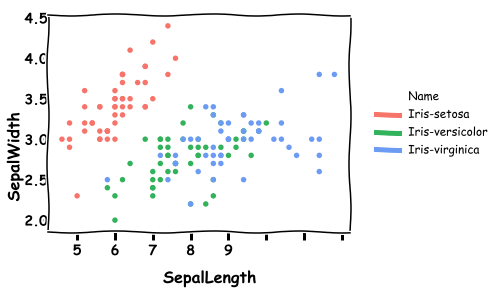

<ggplot: (279365225)>

In [18]:
from ggplot import *
ggplot(aes(x='SepalLength', y='SepalWidth', color = 'Name'), data=iris) +\
    geom_point(size=30)+\
      theme_xkcd()+\
          theme(axis_text_x=element_text(size=14, face="bold", color="black"),\
        axis_text_y=element_text(size=14, face="bold", color="black"),\
        axis_title_x=element_text(size=16, face="bold", color="black",vjust=-.1),\
        axis_title_y=element_text(size=16, face="bold", color="black"),\
        plot_title=element_text(size=0, face="bold"))


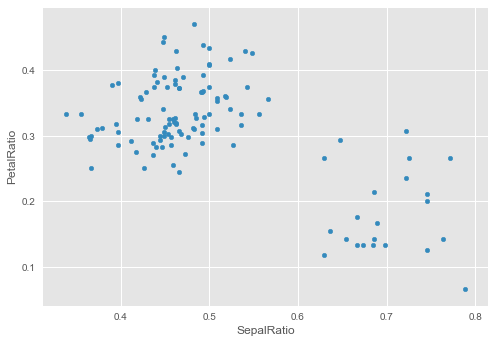

In [80]:
(iris.query('SepalLength > 5')
            .assign(SepalRatio = lambda x: x.SepalWidth / x.SepalLength,
            PetalRatio = lambda x: x.PetalWidth / x.PetalLength)
            .plot(kind='scatter', x='SepalRatio', y='PetalRatio'));